In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Handling Missing Values**

In [3]:
cabinletter = []
for cabin in df.Cabin:
    cabinletter.append(str(cabin)[0])

In [4]:
df['CabinLetter'] = cabinletter
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n


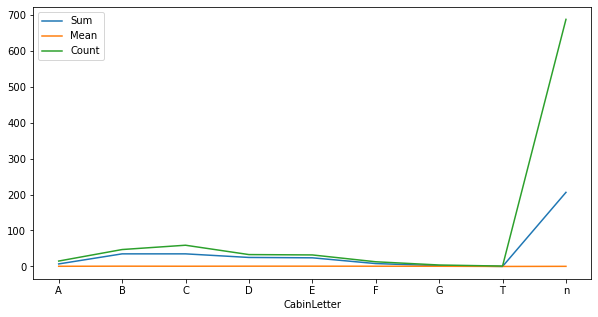

In [5]:
plt.figure(figsize=(10,5))
df.groupby(['CabinLetter']).sum()['Survived'].plot()
df.groupby(['CabinLetter']).mean()['Survived'].plot()
df.groupby(['CabinLetter']).count()['Survived'].plot()
plt.legend(['Sum', 'Mean', 'Count'])

In [6]:
# Decided to drop Cabin too
df = df.drop(['Name', 'Ticket', 'Cabin', 'CabinLetter' ], axis='columns')
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [7]:
dropped_df = df.drop(['PassengerId', 'Survived'], axis='columns')

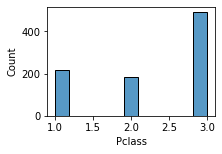

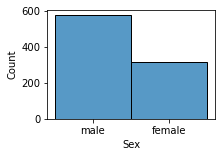

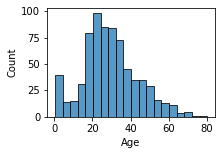

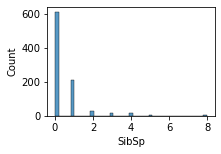

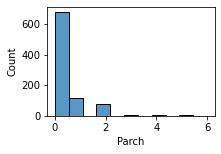

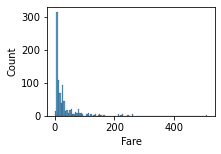

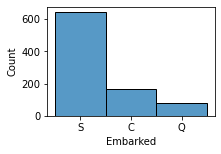

In [8]:
for column in dropped_df.columns:
    plt.figure(figsize=(3,2))
    sns.histplot(df[column], bins='auto')
    plt.show()

In [9]:
print('Missing Ratio :')
dropped_df.isna().sum() * 100 / dropped_df.isna().count()

Missing Ratio :


Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [10]:
# Filling Embarked column
df.Embarked = df.Embarked.fillna('S')
df = df.dropna(axis='index')
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


**Machine Learning Models**

In [11]:
# Creating train_df for dummies
train_df = pd.get_dummies(df[['Sex', 'Embarked']], drop_first=True)
train_df.head(2)

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0


In [12]:
# Adding numerical variables to train_df
train_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']] = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']]
train_df.head(2)

,Sex_male,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,1,0,3,22.0,1,0,7.2500
1,0,0,0,2,1,1,38.0,1,0,71.2833


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#for column in ['Age', 'Fare', 'Pclass']:
#    train_df[column] = scaler.fit_transform(train_df[[column]])

In [14]:
train_df.head(2)

,Sex_male,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,1,0,3,22.0,1,0,7.2500
1,0,0,0,2,1,1,38.0,1,0,71.2833


In [15]:
X = train_df.drop(['PassengerId', 'Survived'], axis='columns')
y = train_df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
models = [SVC(), RandomForestClassifier(), LogisticRegression(max_iter=1000), GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), GradientBoostingClassifier()]

In [18]:
scores = []
for model in models:
    scores.append({
        model : cross_val_score(model, X, y, cv=5).mean()
    })
scores

[{SVC(): 0.669496700482616},
 {RandomForestClassifier(): 0.7927903082832659},
 {LogisticRegression(max_iter=1000): 0.78856495617059},
 {GaussianNB(): 0.7745789421845759},
 {MultinomialNB(): 0.6891165172855314},
 {DecisionTreeClassifier(): 0.7479858169999015},
 {GradientBoostingClassifier(): 0.8193932827735644}]

In [19]:
svc = SVC()
svc.fit(X,y)
svc.score(X_test, y_test)

0.6573426573426573

In [20]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X,y)
logr.score(X_test, y_test)

0.7482517482517482

In [21]:
forest = RandomForestClassifier()
forest.fit(X,y)
forest.score(X_test, y_test)

0.9790209790209791

In [22]:
gboost = GradientBoostingClassifier()
gboost.fit(X,y)
gboost.score(X_test, y_test)

0.8811188811188811

**Preparing test data**

In [23]:
test = pd.read_csv('test.csv')

In [24]:
test.isna().sum() * 100 / test.isna().count()

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [25]:
test = test.drop('Cabin', axis='columns')

test.Fare = test.Fare.fillna(test.Fare.median())

test.Age = test.Age.fillna(test.Age.median())

In [26]:
# This 'finaltest' is for handling dummie variables
finaltest = pd.get_dummies(test[['Sex', 'Embarked']], drop_first=True)
finaltest[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']] = test[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']]
finaltest.head(2)

,Sex_male,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,1,0,892,3,34.5,0,0,7.8292
1,0,0,1,893,3,47.0,1,0,7.0000


In [27]:
predict = gboost.predict(finaltest.drop(['PassengerId'], axis='columns'))

In [28]:
submission = pd.DataFrame()
submission['PassengerId'] = finaltest['PassengerId']
submission['Survived'] = predict
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
submission.to_csv('Submission.csv', index=False)